<center><img src="Logo.png" alt="logo"></center>

<h5 style="color:blue">
Presentado por el Alumno: Javier Edgar Esteban 
Ghithub: JavierEdgarEsteban77 
Carrera: DataScience Cohorte 05PT 02 Año 2.023</h5>

<h3 style="color:green">
Proyecto: Obtención del Minimum Viable Product (MUV) solicitado por la empresa Steam sobre la recomendación de videos juegos y optimización para usuarios: 'worried'</h3>

<h5 style="color:white">
Propuesta de Trabajo

En este notebook primero vamos a trabajar el Extract, Transform and Load (ETL) el cual trabajaremos el Rol de Data Engineer y posteriormente el 

Análisis Exploratorio de Datos (EDA).

La impronta que tendrá este trabajo individual desde el punto de vista técnico es extraer los datos en dónde trabajaremos los archivos:

steam_games.json; user__reviews.json y users_items.json

Cargo los datos de archivos JSON y los convierto en DataFrames de Pandas. Una vez transformados a nuestros df, estaremos en condición de la posterior preparación de la documentación para poder realizar un correcto análisis exploratorio que satisfaga las nececidades de nuestro cliente brindando información de calidad para una correcta toma de desición.

In [1]:
# Importo librerías.
import json
import pandas as pd
import ast
from tqdm import tqdm

# Creo la función para leer las líneas de cada dataset.
def leer_datos(ruta, tipo='json'):
    """
    Esta función lee datos desde cada archivo de mi carpeta y los convierte en un DataFrame de pandas.

    Args:
        ruta (str): La ruta al archivo que se va a leer.
        tipo (str, optional): El formato de los datos en el archivo. Puede ser 'json' o 'literal'. 
                              Si es 'json', los datos se cargarán utilizando json.loads. 
                              Si es 'literal', los datos se cargarán utilizando ast.literal_eval. 
                              Por defecto es 'json'.

    Returns:
        pd.DataFrame: Un DataFrame de pandas que contiene los datos leídos del archivo.
    """
    filas = []  # Será la lista para almacenar cada fila de datos

    # Abro el archivo en modo lectura con codificación utf-8

    with open(ruta, encoding='utf-8') as f:
        # Leo cada línea del archivo
        for line in tqdm(f.readlines(), desc=f"Leyendo {ruta}"):
            # Si el tipo es 'json', carga los datos con json.loads
            if tipo == 'json':
                data = json.loads(line)
            # Si el tipo es 'literal', carga los datos con ast.literal_eval
            elif tipo == 'literal':
                data = ast.literal_eval(line)
             # Añado los datos a la lista de filas
            filas.append(data)

    # Convierto la lista de filas en un DataFrame de pandas y lo devuelve.
    return pd.DataFrame(filas)

# Determino la ruta de cada dataset.
ruta_games = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\steam_games.json'
ruta_reviews = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\user_reviews.json'
ruta_items = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\users_items.json'

# Convierto en dataframe cada datasets
df_steam_games = leer_datos(ruta_games, tipo='json')
df_user_reviews = leer_datos(ruta_reviews, tipo='literal')
df_users_items = leer_datos(ruta_items, tipo='literal')

Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\steam_games.json: 100%|██████████| 120445/120445 [00:01<00:00, 80249.54it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\user_reviews.json: 100%|██████████| 25799/25799 [00:03<00:00, 6650.97it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\users_items.json: 100%|██████████| 88310/88310 [03:39<00:00, 401.91it/s] 


<h3 style="color:green">
Nuestros dataframes se llaman: df_steam_games; df_user_reviews y df_users_items

<h5 style="color:blue">
Trabajaré son Steam Games

In [2]:
# Visualizo el contenido para poder analizar los pasos a seguir.
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [3]:
print(f"""
El df_steam_games tiene {df_steam_games.shape[0]} filas y {df_steam_games.shape[1]} columnas.
Las columnas son: {df_steam_games.columns}
""")


El df_steam_games tiene 120445 filas y 13 columnas.
Las columnas son: Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')



### Procederé a visualizar las columnas que contienen una lista o un diccionario.

In [4]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_steam_games.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_steam_games[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

La columna 'publisher' no contiene ni listas ni diccionarios.
La columna 'genres' contiene una lista.
La columna 'app_name' no contiene ni listas ni diccionarios.
La columna 'title' no contiene ni listas ni diccionarios.
La columna 'url' no contiene ni listas ni diccionarios.
La columna 'release_date' no contiene ni listas ni diccionarios.
La columna 'tags' contiene una lista.
La columna 'reviews_url' no contiene ni listas ni diccionarios.
La columna 'specs' contiene una lista.
La columna 'price' no contiene ni listas ni diccionarios.
La columna 'early_access' no contiene ni listas ni diccionarios.
La columna 'id' no contiene ni listas ni diccionarios.
La columna 'developer' no contiene ni listas ni diccionarios.


### Desanido columnas que contienen listas creando variables ficticias con dumies para conocer su contenido.

In [5]:
# Importo librerías.
import pandas as pd

def desanidar_y_crear_dummies(df, column):
    """
    Esta función desanida la columna 'genres', 'tags' y 'specs' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns

    # Desanido la columna y creo  variables ficticias.
    df_dummies = df[column].str.join('|').str.get_dummies()

    # Concateno las variables ficticias al DataFrame original.
    df = pd.concat([df, df_dummies], axis=1)

    # Elimino la columna original.
    df = df.drop(column, axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para columnas específicas
df_steam_games = df_steam_games  # aquí coloco el nombre del df y su nombre
columns = ['genres', 'tags', 'specs']  # aquí coloco los nombres de las columnas

for column in columns:
    df_steam_games, new_columns = desanidar_y_crear_dummies(df_steam_games, column)
    if column == 'genres':
        new_columns_genres = new_columns
    elif column == 'tags':
        new_columns_tags = new_columns
    elif column == 'specs':
        new_columns_specs = new_columns

print(f"""
El df_steam_games tiene {df_steam_games.shape[0]} filas y {df_steam_games.shape[1]} columnas.
Las columnas son: {df_steam_games.columns}

Nuevas columnas para 'genres': {new_columns_genres}
Nuevas columnas para 'tags': {new_columns_tags}
Nuevas columnas para 'specs': {new_columns_specs}
""")

""" Si bien el código corre perfectamente eliminé la salida a los efectos de optimizar el tiempo de presentación """


El df_steam_games tiene 120445 filas y 411 columnas.
Las columnas son: Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)

Nuevas columnas para 'genres': ['Accounting', 'Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production', 'Casual', 'Design &amp; Illustration', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing']
Nuevas columnas para 'tags': ['1980s', "1990's", '2.5D', '2D', '2D Fighter', '360 Video', '3D Platformer', '3D 

' Si bien el código corre perfectamente eliminé la salida a los efectos de optimizar el tiempo de presentación '

#### Normalizo mi df_steam_games eliminando filas vacías, NaN y analizaremos en porcentajes cuántos datos nulos o vacíos representan en el total del df y desanidando 'genres'.

In [8]:
# Importo librerías.
import pandas as pd

# Guardo el número de filas antes de la eliminación.
num_rows_before = df_steam_games.shape[0]

# Imprimo los tipos de datos por columna y cantidad de nulos.
print("Tipos de datos por columna y cantidad de nulos:")
print(df_steam_games.dtypes)
print(df_steam_games.isnull().sum())

# Elimino las filas donde cualquier valor es NaN
print("Eliminando filas con valores nulos...")
df_steam_games = df_steam_games.dropna(how='any').reset_index(drop=True)

# Reseteo el índice del DataFrame
print("Reseteando el índice del DataFrame...")
df_steam_games.reset_index(drop=True, inplace=True)

# Guardo el número de filas después de la eliminación
num_rows_after = df_steam_games.shape[0]

# Calculo la reducción porcentual
reduction_percentage = (1 - num_rows_after / num_rows_before) * 100

# Imprimo la reducción porcentual
print(f"La reducción de filas es aproximadamente del {reduction_percentage:.2f}%.")

# Verifico los tipos de datos por columna.
print("Tipos de datos por columna después de la eliminación:")
print(df_steam_games.dtypes)

# Reviso las columnas
for col in df_steam_games.columns:
    print(f"Columna: {col}")
    print(f"Primer valor: {df_steam_games[col].iloc[0]}")

    # Convierto las listas a cadenas antes de llamar a unique()
    unique_values = pd.Series([str(x) if isinstance(x, list) else x for x in df_steam_games[col]]).unique()
    print(f"Valores únicos: {unique_values}\n")

Tipos de datos por columna y cantidad de nulos:
publisher                     object
app_name                      object
title                         object
url                           object
release_date                  object
                               ...  
Steam Workshop                 int64
SteamVR Collectibles           int64
Tracked Motion Controllers     int64
Valve Anti-Cheat enabled       int64
Windows Mixed Reality          int64
Length: 411, dtype: object
publisher                     0
app_name                      0
title                         0
url                           0
release_date                  0
                             ..
Steam Workshop                0
SteamVR Collectibles          0
Tracked Motion Controllers    0
Valve Anti-Cheat enabled      0
Windows Mixed Reality         0
Length: 411, dtype: int64
Eliminando filas con valores nulos...
Reseteando el índice del DataFrame...
La reducción de filas es aproximadamente del 0.00%.
Tipos de dat

Valores únicos: ['Kotoshiro' 'Making Fun, Inc.' 'Poolians.com' ... 'OrtiGames/OrtiSoft'
 'INGAME' 'Bidoniera Games']

Columna: app_name
Primer valor: Lost Summoner Kitty
Valores únicos: ['Lost Summoner Kitty' 'Ironbound' 'Real Pool 3D - Poolians' ...
 'LOGistICAL: South Africa' 'Russian Roads' 'EXIT 2 - Directions']

Columna: title
Primer valor: Lost Summoner Kitty
Valores únicos: ['Lost Summoner Kitty' 'Ironbound' 'Real Pool 3D - Poolians' ...
 'LOGistICAL: South Africa' 'Russian Roads' 'EXIT 2 - Directions']

Columna: url
Primer valor: http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/
Valores únicos: ['http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/'
 'http://store.steampowered.com/app/643980/Ironbound/'
 'http://store.steampowered.com/app/670290/Real_Pool_3D__Poolians/' ...
 'http://store.steampowered.com/app/733530/LOGistICAL_South_Africa/'
 'http://store.steampowered.com/app/610660/Russian_Roads/'
 'http://store.steampowered.com/app/658870/EXIT_2__Directi

In [9]:
# Importo librerías.
import html

print("Normalizo los nombres de las columnas")

# Normalizo los nombres de las columnas
df_steam_games.columns = df_steam_games.columns.map(html.unescape)

# Recreo las listas 'new_columns_genres', 'new_columns_tags' y 'new_columns_specs' para reflejar los cambios en los nombres de las columnas
new_columns_genres = [col for col in df_steam_games.columns if col in new_columns_genres]
new_columns_tags = [col for col in df_steam_games.columns if col in new_columns_tags]
new_columns_specs = [col for col in df_steam_games.columns if col in new_columns_specs]

# Imprimo los nombres de las columnas y las nuevas columnas
print(f"""
Columnas del dataframe:
{df_steam_games.columns}

Nuevas columnas para 'genres':
{new_columns_genres}

Nuevas columnas para 'tags':
{new_columns_tags}

Nuevas columnas para 'specs':
{new_columns_specs}
""")
""" Si bien el código corre perfectamente eliminé la salida a los efectos de optimizar el tiempo de presentación """

Normalizo los nombres de las columnas

Columnas del dataframe:
Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)

Nuevas columnas para 'genres':
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing', 'Action', 'Adventure', 'Audio Production', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation

' Si bien el código corre perfectamente eliminé la salida a los efectos de optimizar el tiempo de presentación '

### Elimino duplicados.

In [10]:
# Importo librerías.
import numpy as np

# Obtengo todas las columnas del DataFrame
all_columns = df_steam_games.columns.tolist()

# Aseguro que 'developer' esté en la lista de columnas a verificar
if 'developer' not in all_columns:
    all_columns.append('developer')

# Calculo el número de columnas a seleccionar (30% de todas las columnas)
num_columns_to_check = int(len(all_columns) * 0.3)

# Selecciono un subconjunto de columnas al azar
np.random.seed(0)  # Para reproducibilidad
columns_to_check = np.random.choice(all_columns, num_columns_to_check, replace=False)

# Imprimo el número de filas antes de la eliminación de duplicados
print("Número de filas antes de la eliminación de duplicados:", df_steam_games.shape[0])

# Elimino los duplicados del DataFrame
df_steam_games.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)

# Imprimo el número de filas después de la eliminación de duplicados
print("Número de filas después de la eliminación de duplicados:", df_steam_games.shape[0])

# Imprimo las columnas que se usaron para verificar los duplicados
""" Tomé la decición de omitir esa salida por ser muy grande """
# print("\nColumnas que se usaron para verificar los duplicados:") 
# print(columns_to_check)


Número de filas antes de la eliminación de duplicados: 22916
Número de filas después de la eliminación de duplicados: 22915


' Tomé la decición de omitir esa salida por ser muy grande '

In [11]:
# Verifico las filas duplicadas
hay_duplicados = df_steam_games.duplicated(subset='id', keep=False).any()
print('¿Hay filas duplicadas?', hay_duplicados)


¿Hay filas duplicadas? False


### Graficaré para interpretar al contenido de 'genres' que se desanido, en este caso la frecuencia.

In [13]:
print(df_steam_games.columns)
print(new_columns_genres)
print(new_columns_specs)
print(new_columns_tags)

Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing', 'Action', 'Adventure', 'Audio Production', 'Casual', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing'

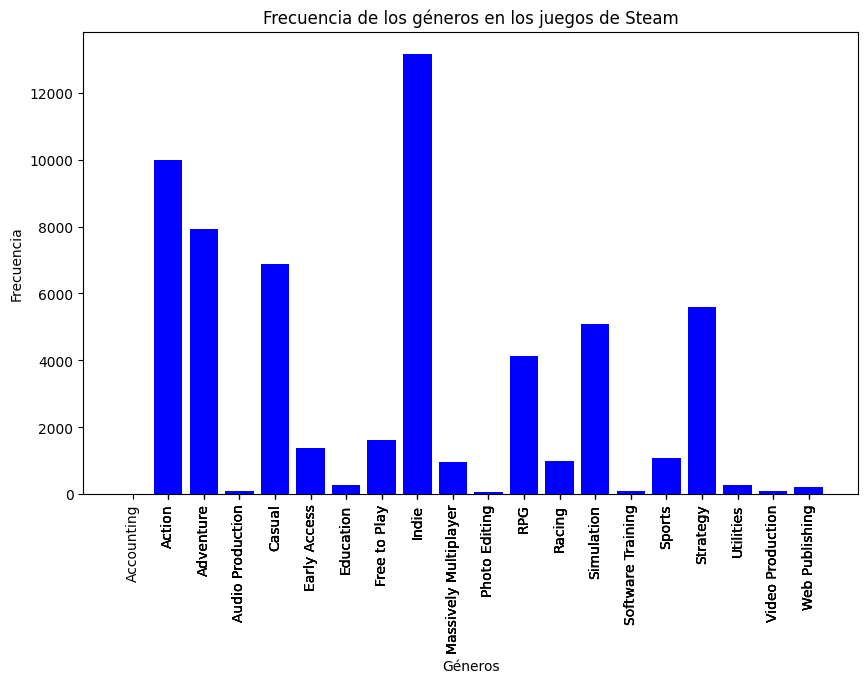

El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.
El género más popular es **Indie**, con **13172** juegos.
Los géneros menos populares son **Accounting, Audio Production, Audio Production, Early Access, Early Access, Education, Education, Free to Play, Free to Play, Massively Multiplayer, Massively Multiplayer, Photo Editing, Photo Editing, RPG, RPG, Racing, Racing, Simulation, Software Training, Software Training, Sports, Sports, Utilities, Utilities, Video Production, Video Production, Web Publishing, Web Publishing, Audio Production, Audio Production, Early Access, Early Access, Education, Education, Free to Play, Free to Play, Massively Multiplayer, Massively Multiplayer, Photo Editing, Photo Editing, RPG, RPG, Racing, Racing, Simulation, Software Training, Software Training, Sports, Sports, Utilities, Utilities, Video Production, Video Production, Web Publishing, Web Publishing**, con menos de 5000 j

In [16]:
# Importo librerías.
import matplotlib.pyplot as plt
import textwrap

def generate_graph_and_description(df_steam_games, new_columns_genres):

    # Cuento la frecuencia de cada género.
    genre_counts = df_steam_games[new_columns_genres].sum()

    # Creo el gráfico de barras.
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(genre_counts.index, genre_counts.values, color='b')

    # Agrego etiquetas a los ejes.
    ax.set_xlabel('Géneros')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de los géneros en los juegos de Steam')

    # Roto las etiquetas del eje x para una mejor visualización.
    ax.set_xticks(genre_counts.index)  # Establece las posiciones de las etiquetas del eje x
    ax.set_xticklabels(genre_counts.index, rotation=90)  # Establece las etiquetas y la rotación

    # Obtengo el género más popular.
    max_index = genre_counts.argmax()

    # Obtengo los géneros menos populares.
    low_count_genres = genre_counts[genre_counts <= 5000]
    low_count_genres_names = low_count_genres.index.to_list()

    # Genero la descripción del gráfico.
    response = f"El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.\n"
    response += f"El género más popular es **{genre_counts.index[max_index]}**, con **{genre_counts.values[max_index]}** juegos.\n"
    response += f"Los géneros menos populares son **{', '.join(low_count_genres_names)}**, con menos de 5000 juegos cada uno."

    # Añado la tipología.
    response += f"\n\n**Tipología:** {textwrap.fill('Descripción objetiva', 20, initial_indent='**', subsequent_indent=' ')}"

    # Muestro el gráfico.
    plt.show()

    return fig, ax, response

def main(df_steam_games, new_columns_genres):

    # Genero el gráfico y la descripción.
    fig, ax, response = generate_graph_and_description(df_steam_games, new_columns_genres)

    # Imprimo la descripción.
    print(response)

if __name__ == "__main__":
    # Aquí debes definir df_steam_games y new_columns_genres antes de llamar a main.
    main(df_steam_games, new_columns_genres)


### Análisis de la columnas.

In [ ]:
print(df_steam_games.columns)
print(new_columns_genres)
print(new_columns_tags)
print(new_columns_specs)

In [17]:
# Importo librerías.
from tqdm import tqdm

def analizar_columna_individual(df, columna):
    """
    Esta función analiza cada columna individualmente, en este caso 'genres', 'tags' y 'specs' de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    columna (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    # Verifico si la columna existe en el DataFrame
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return

    # Verifico si hay valores nulos
    num_nulls = df[columna].isnull().sum()
    
    # Obtengo un resumen de la columna
    resumen = df[columna].describe()

    print(f"Columna '{columna}':\n{resumen}\nNúmero de valores nulos = {num_nulls}\n")

# Uso de la función para cada columna nueva
for columna in tqdm(new_columns_genres + new_columns_tags + new_columns_specs):
    analizar_columna_individual(df_steam_games, columna)


  1%|▏         | 6/401 [00:00<00:06, 57.18it/s]

Columna 'Accounting':
count    22915.000000
mean         0.000305
std          0.017476
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Accounting, dtype: float64
Número de valores nulos = 0

Columna 'Action':
             Action        Action
count  22915.000000  22915.000000
mean       0.411564      0.436483
std        0.492128      0.495960
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos = Action    0
Action    0
dtype: int64

Columna 'Adventure':
          Adventure     Adventure
count  22915.000000  22915.000000
mean       0.306655      0.346411
std        0.461115      0.475836
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos =

  4%|▍         | 18/401 [00:00<00:08, 43.83it/s]

Columna 'RPG':
                RPG           RPG
count  22915.000000  22915.000000
mean       0.166267      0.179795
std        0.372328      0.384025
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Número de valores nulos = RPG    0
RPG    0
dtype: int64

Columna 'Racing':
             Racing        Racing
count  22915.000000  22915.000000
mean       0.041327      0.042985
std        0.199049      0.202828
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Número de valores nulos = Racing    0
Racing    0
dtype: int64

Columna 'Simulation':
         Simulation    Simulation
count  22915.000000  22915.000000
mean       0.206371      0.221252
std        0.404709      0.415099
min        0.000000      0.000000
25%        0.000000      0.000000
50%    

  7%|▋         | 29/401 [00:00<00:08, 46.03it/s]

Columna 'Action':
             Action        Action
count  22915.000000  22915.000000
mean       0.411564      0.436483
std        0.492128      0.495960
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos = Action    0
Action    0
dtype: int64

Columna 'Adventure':
          Adventure     Adventure
count  22915.000000  22915.000000
mean       0.306655      0.346411
std        0.461115      0.475836
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos = Adventure    0
Adventure    0
dtype: int64

Columna 'Audio Production':
       Audio Production  Audio Production
count      22915.000000      22915.000000
mean           0.003011          0.003317
std            0.054792          0.057496
min            0.00

 11%|█▏        | 46/401 [00:00<00:05, 64.34it/s]

Columna 'Racing':
             Racing        Racing
count  22915.000000  22915.000000
mean       0.041327      0.042985
std        0.199049      0.202828
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Número de valores nulos = Racing    0
Racing    0
dtype: int64

Columna 'Simulation':
         Simulation    Simulation
count  22915.000000  22915.000000
mean       0.206371      0.221252
std        0.404709      0.415099
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max        1.000000      1.000000
Número de valores nulos = Simulation    0
Simulation    0
dtype: int64

Columna 'Software Training':
       Software Training  Software Training
count       22915.000000       22915.000000
mean            0.003753           0.004189
std             0.061148           0.064591
min    

 19%|█▉        | 76/401 [00:01<00:03, 106.09it/s]

Columna 'Action-Adventure':
count    22915.000000
mean         0.008073
std          0.089490
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Action-Adventure, dtype: float64
Número de valores nulos = 0

Columna 'Agriculture':
count    22915.000000
mean         0.001702
std          0.041220
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Agriculture, dtype: float64
Número de valores nulos = 0

Columna 'Aliens':
count    22915.000000
mean         0.006459
std          0.080108
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Aliens, dtype: float64
Número de valores nulos = 0

Columna 'Alternate History':
count    22915.000000
mean         0.002444
std          0.049376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Alt

 28%|██▊       | 113/401 [00:01<00:02, 142.56it/s]

Columna 'Chess':
count    22915.000000
mean         0.001222
std          0.034935
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Chess, dtype: float64
Número de valores nulos = 0

Columna 'Choices Matter':
count    22915.000000
mean         0.008117
std          0.089730
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Choices Matter, dtype: float64
Número de valores nulos = 0

Columna 'Choose Your Own Adventure':
count    22915.000000
mean         0.007681
std          0.087303
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Choose Your Own Adventure, dtype: float64
Número de valores nulos = 0

Columna 'Cinematic':
count    22915.000000
mean         0.001702
std          0.041220
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.00

 38%|███▊      | 152/401 [00:01<00:01, 159.98it/s]

Columna 'Dynamic Narration':
count    22915.000000
mean         0.000480
std          0.021905
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Dynamic Narration, dtype: float64
Número de valores nulos = 0

Columna 'Dystopian':
count    22915.000000
mean         0.003884
std          0.062201
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Dystopian, dtype: float64
Número de valores nulos = 0

Columna 'Economy':
count    22915.000000
mean         0.006502
std          0.080376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Economy, dtype: float64
Número de valores nulos = 0

Columna 'Episodic':
count    22915.000000
mean         0.003317
std          0.057496
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Episodic, dt

 47%|████▋     | 187/401 [00:01<00:01, 147.39it/s]

Columna 'Hacking':
count    22915.000000
mean         0.002575
std          0.050678
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Hacking, dtype: float64
Número de valores nulos = 0

Columna 'Hand-drawn':
count    22915.00000
mean         0.00480
std          0.06912
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: Hand-drawn, dtype: float64
Número de valores nulos = 0

Columna 'Hardware':
count    22915.000000
mean         0.000087
std          0.009342
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Hardware, dtype: float64
Número de valores nulos = 0

Columna 'Heist':
count    22915.000000
mean         0.001266
std          0.035553
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Heist, dtype: float64
Número de valores

 51%|█████     | 203/401 [00:01<00:01, 142.39it/s]

Columna 'MMORPG':
count    22915.000000
mean         0.007070
std          0.083785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: MMORPG, dtype: float64
Número de valores nulos = 0

Columna 'MOBA':
count    22915.000000
mean         0.003186
std          0.056353
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: MOBA, dtype: float64
Número de valores nulos = 0

Columna 'Magic':
count    22915.000000
mean         0.006633
std          0.081176
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Magic, dtype: float64
Número de valores nulos = 0

Columna 'Management':
count    22915.000000
mean         0.013834
std          0.116803
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Management, dtype: float64
Número de valores n

 58%|█████▊    | 232/401 [00:02<00:01, 127.90it/s]

Columna 'Multiplayer':
count    22915.000000
mean         0.093869
std          0.291652
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Multiplayer, dtype: float64
Número de valores nulos = 0

Columna 'Multiple Endings':
count    22915.000000
mean         0.005237
std          0.072177
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Multiple Endings, dtype: float64
Número de valores nulos = 0

Columna 'Music':
count    22915.000000
mean         0.009906
std          0.099038
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Music, dtype: float64
Número de valores nulos = 0

Columna 'Music-Based Procedural Generation':
count    22915.000000
mean         0.000829
std          0.028784
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.00

 65%|██████▍   | 260/401 [00:02<00:01, 127.17it/s]

Columna 'Platformer':
count    22915.000000
mean         0.060179
std          0.237823
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Platformer, dtype: float64
Número de valores nulos = 0

Columna 'Point & Click':
count    22915.000000
mean         0.036395
std          0.187276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Point & Click, dtype: float64
Número de valores nulos = 0

Columna 'Political':
count    22915.000000
mean         0.002051
std          0.045243
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Political, dtype: float64
Número de valores nulos = 0

Columna 'Politics':
count    22915.000000
mean         0.002138
std          0.046194
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Politics, dtyp

 68%|██████▊   | 273/401 [00:02<00:01, 127.61it/s]

Columna 'Robots':
count    22915.000000
mean         0.007331
std          0.085311
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Robots, dtype: float64
Número de valores nulos = 0

Columna 'Rogue-like':
count    22915.000000
mean         0.020554
std          0.141889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Rogue-like, dtype: float64
Número de valores nulos = 0

Columna 'Rogue-lite':
count    22915.000000
mean         0.010604
std          0.102432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Rogue-lite, dtype: float64
Número de valores nulos = 0

Columna 'Romance':
count    22915.000000
mean         0.005848
std          0.076248
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Romance, dtype: float64
Núm

 74%|███████▍  | 298/401 [00:02<00:00, 103.19it/s]

Columna 'Short':
count    22915.000000
mean         0.014052
std          0.117708
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Short, dtype: float64
Número de valores nulos = 0

Columna 'Side Scroller':
count    22915.000000
mean         0.014707
std          0.120378
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Side Scroller, dtype: float64
Número de valores nulos = 0

Columna 'Silent Protagonist':
count    22915.000000
mean         0.001484
std          0.038492
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Silent Protagonist, dtype: float64
Número de valores nulos = 0

Columna 'Singleplayer':
count    22915.000000
mean         0.177046
std          0.381716
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Si

 81%|████████  | 323/401 [00:02<00:00, 109.74it/s]

Columna 'Superhero':
count    22915.000000
mean         0.002531
std          0.050247
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Superhero, dtype: float64
Número de valores nulos = 0

Columna 'Supernatural':
count    22915.000000
mean         0.001658
std          0.040689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Supernatural, dtype: float64
Número de valores nulos = 0

Columna 'Surreal':
count    22915.000000
mean         0.006808
std          0.082230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Surreal, dtype: float64
Número de valores nulos = 0

Columna 'Survival':
count    22915.000000
mean         0.033472
std          0.179868
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Survival, dtype: float

 88%|████████▊ | 353/401 [00:03<00:00, 124.41it/s]

Columna 'Twin Stick Shooter':
count    22915.000000
mean         0.007855
std          0.088282
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Twin Stick Shooter, dtype: float64
Número de valores nulos = 0

Columna 'Typing':
count    22915.000000
mean         0.001309
std          0.036160
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Typing, dtype: float64
Número de valores nulos = 0

Columna 'Underground':
count    22915.000000
mean         0.000262
std          0.016180
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Underground, dtype: float64
Número de valores nulos = 0

Columna 'Underwater':
count    22915.000000
mean         0.002138
std          0.046194
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Underw

 96%|█████████▌| 383/401 [00:03<00:00, 128.98it/s]

Columna 'Full controller support':
count    22915.000000
mean         0.258041
std          0.437566
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Full controller support, dtype: float64
Número de valores nulos = 0

Columna 'Game demo':
count    22915.000000
mean         0.000218
std          0.014770
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Game demo, dtype: float64
Número de valores nulos = 0

Columna 'Gamepad':
count    22915.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Gamepad, dtype: float64
Número de valores nulos = 0

Columna 'HTC Vive':
count    22915.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: HTC Vive, dtype: float64
Número de valores nulos = 0

Columna 'In-App Purchases'

100%|██████████| 401/401 [00:03<00:00, 114.71it/s]

Columna 'Steam Trading Cards':
count    22915.000000
mean         0.406459
std          0.491183
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Steam Trading Cards, dtype: float64
Número de valores nulos = 0

Columna 'Steam Turn Notifications':
count    22915.000000
mean         0.003186
std          0.056353
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Steam Turn Notifications, dtype: float64
Número de valores nulos = 0

Columna 'Steam Workshop':
count    22915.00000
mean         0.06319
std          0.24331
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: Steam Workshop, dtype: float64
Número de valores nulos = 0

Columna 'SteamVR Collectibles':
count    22915.000000
mean         0.000044
std          0.006606
min          0.000000
25%          0.000000
50%          0.000000
75%       

### Trabajaré publisher

In [18]:
""" procederé a recontar valores únicos en orden descendente, por lo que el primer elemento es el elemento que ocurre con más frecuencia."""

# Calculo los recuentos de valores
publisher_counts = df_steam_games['publisher'].value_counts()

# Ordeno los recuentos de valores en orden descendente
publisher_counts = publisher_counts.sort_values(ascending=False)

# Muestro los recuentos de valores en formato de tabla
print(publisher_counts.to_string())

""" Si bien el código corre perfectamente eliminé la salida a los efectos de optimizar el tiempo de presentación """

publisher
Ubisoft                                                                               368
Dovetail Games - Trains                                                               359
Degica                                                                                280
Paradox Interactive                                                                   264
SEGA                                                                                  230
Dovetail Games - Flight                                                               220
Activision                                                                            201
Big Fish Games                                                                        194
KOEI TECMO GAMES CO., LTD.                                                            192
KISS ltd                                                                              182
Dovetail Games                                                                        176


' Si bien el código corre perfectamente eliminé la salida a los efectos de optimizar el tiempo de presentación '

### Analizo 'publisher'

In [29]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'publisher'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'publisher'
--------------------------------------------------

Primeros 20 valores:
0                          Kotoshiro
1                   Making Fun, Inc.
2                       Poolians.com
3                               彼岸领域
4                Trickjump Games Ltd
5             Poppermost Productions
6             Poppermost Productions
7     Stegalosaurus Game Development
8                  Copperpick Studio
9                       Ghulam Jewel
10                            Apillo
11            Poppermost Productions
12                            Apillo
13            Poppermost Productions
14                       Tero Lunkka
15                      FrozenPepper
16                      FrozenPepper
17                     Casey Labrack
18               Stainless Games Ltd
19                             Valve
Name: publisher, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
publisher
Ubisoft                    368
Dov

In [31]:
# Lista de nombres de juegos para verificar duplicados
game_names = ['Degica', 'Päradox Interactive', 'Sega']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Degica' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Degica.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Päradox Interactive' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Päradox Interactive.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Sega' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Sega.


In [ ]:
# Elimino dicha columna no la usaré por ahora en mi trabajo.
df_steam_games = df_steam_games.drop(columns='publisher')

### Trabajaré genres, tags y specs.

#### Vamos a realizar un preprocesamiento y análisis, aplanado listas, tratando valores nulos y creando variables ficticias cuya finalidad es transformar datos categóricos en un formato numérico para que los algoritmos de machine learning puedan procesar más adelante.

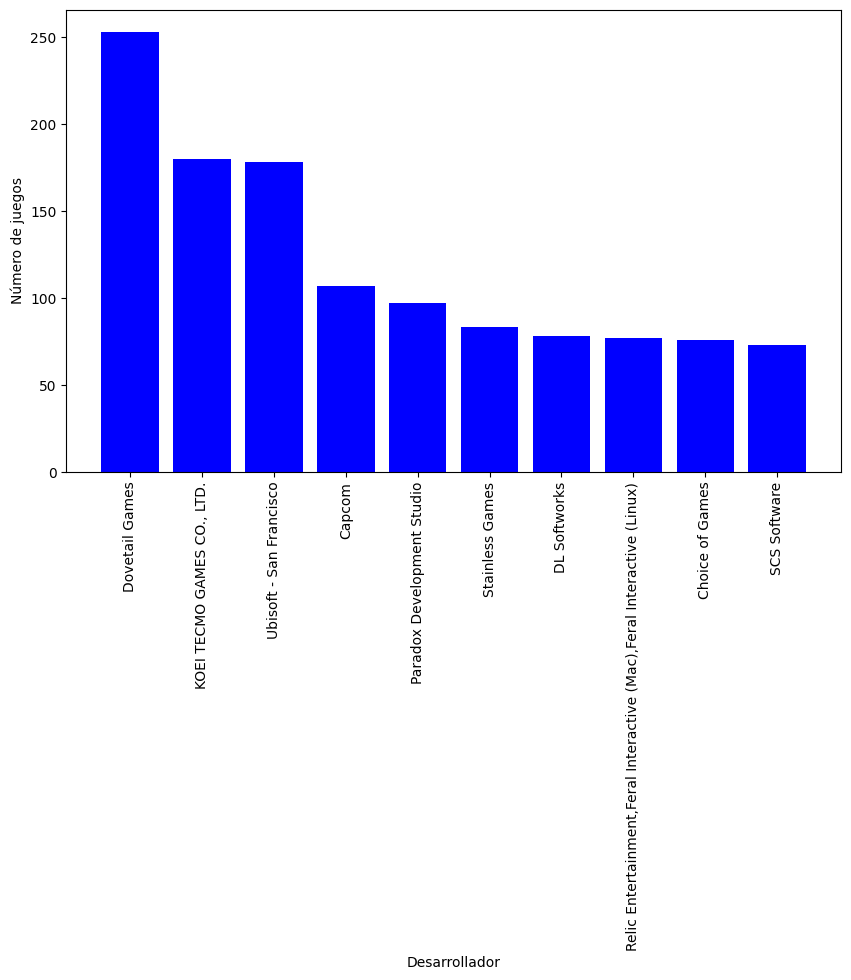

El gráfico muestra la distribución de Desarrollador en los juegos. Aquí están los cinco más comunes:
* Dovetail Games: 253 juegos
* KOEI TECMO GAMES CO., LTD.: 180 juegos
* Ubisoft - San Francisco: 178 juegos
* Capcom: 107 juegos
* Paradox Development Studio: 97 juegos



In [19]:
# Importo librerías.
import matplotlib.pyplot as plt
import pandas as pd

def generate_graph_and_description(df, column, title):
    """
    Genera un gráfico y una descripción para una columna específica de un DataFrame.

    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): La columna del DataFrame a graficar.
    title (str): El título del gráfico.
    """
    # Calculamos los conteos de la columna
    counts = df[column].value_counts()

    # Generamos el gráfico
    plt.figure(figsize=(10,6))
    plt.bar(counts.index[:10], counts.values[:10], color='b')  # Mostramos solo los 10 primeros para evitar un gráfico demasiado lleno
    plt.ylabel('Número de juegos')
    plt.xlabel(title)
    plt.xticks(rotation=90)  # Rota las etiquetas del eje x
    plt.show()

    # Genero la descripción
    description = f"El gráfico muestra la distribución de {title} en los juegos. Aquí están los cinco más comunes:\n"
    for developer, count in counts[:5].items():
        description += f"* {developer}: {count} juegos\n"

    print(description)

# Llamo a la función con el DataFrame y la columna que queremos graficar
generate_graph_and_description(df_steam_games, 'developer', 'Desarrollador')

### Trabajaré app_name y title

In [20]:
def print_dataframe(df):
    """
    Imprime el contenido de las columnas del DataFrame.
    """
    print(df[["app_name", "title"]])

def filter_dataframe(df):
    """
    Crea una máscara cuando app_name es diferente a title y muestra algunos resultados después de aplicar los filtros.
    """
    diferentes = df["app_name"] != df["title"]
    indices_true = diferentes.to_numpy().nonzero()[0]
    sample_size = min(10, len(indices_true))
    print(df.loc[indices_true, ["app_name", "title"]].sample(sample_size))

# Visualizo el contenido de las columnas
print_dataframe(df_steam_games)

# Aplico los filtros y visualizamos algunos resultados
filter_dataframe(df_steam_games)


                       app_name                     title
0           Lost Summoner Kitty       Lost Summoner Kitty
1                     Ironbound                 Ironbound
2       Real Pool 3D - Poolians   Real Pool 3D - Poolians
3                       弹炸人2222                   弹炸人2222
4         Battle Royale Trainer     Battle Royale Trainer
...                         ...                       ...
22911              Kebab it Up!              Kebab it Up!
22912            Colony On Mars            Colony On Mars
22913  LOGistICAL: South Africa  LOGistICAL: South Africa
22914             Russian Roads             Russian Roads
22915       EXIT 2 - Directions       EXIT 2 - Directions

[22915 rows x 2 columns]
                                                app_name  \
10216  Dresden Files Cooperative Card Game - Mouse & ...   
22608                                          Starscape   
12091            Animation Throwdown - Incredible Bundle   
1222   Dungeons & Dragons Online® Cata

In [21]:
""" Verifico si 'app_name' y 'title' son iguales para todas las filas """ 
son_iguales = (df_steam_games['app_name'] == df_steam_games['title']).all()

print(f"¿Son 'app_name' y 'title' iguales para todas las filas? {son_iguales}")

¿Son 'app_name' y 'title' iguales para todas las filas? False


### Analizo 'app_name'

In [22]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'app_name'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'app_name'
--------------------------------------------------

Primeros 20 valores:
0                                   Lost Summoner Kitty
1                                             Ironbound
2                               Real Pool 3D - Poolians
3                                               弹炸人2222
4                                 Battle Royale Trainer
5                            SNOW - All Access Pro Pass
6                         SNOW - All Access Legend Pass
7     Army of Tentacles: (Not) A Cthulhu Dating Sim:...
8                                           Beach Rules
9                           Planetarium 2 - Zen Odyssey
10                              The first thrust of God
11                                  SNOW - Starter Pack
12              The first thrust of God - All Aircrafts
13                                 SNOW - Lifetime Pack
14                             The Warrior Of Treasures
15                         RC Plane 3 - Canyon Scena

In [32]:
# Lista de nombres de juegos para verificar duplicados
game_names = ['Alter Ego', 'Invasion', 'Invisible Apartment Zero']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Alter Ego' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Alter Ego.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invasion' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invasion.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invisible Apartment Zero' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invisible Apartment Zero.


### Analizo 'title'

In [26]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'title'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'title'
--------------------------------------------------

Primeros 20 valores:
0                                   Lost Summoner Kitty
1                                             Ironbound
2                               Real Pool 3D - Poolians
3                                               弹炸人2222
4                                 Battle Royale Trainer
5                            SNOW - All Access Pro Pass
6                         SNOW - All Access Legend Pass
7     Army of Tentacles: (Not) A Cthulhu Dating Sim:...
8                                           Beach Rules
9                           Planetarium 2 - Zen Odyssey
10                              The first thrust of God
11                                  SNOW - Starter Pack
12              The first thrust of God - All Aircrafts
13                                 SNOW - Lifetime Pack
14                             The Warrior Of Treasures
15                         RC Plane 3 - Canyon Scenario

In [33]:
# Lista de nombres de juegos para verificar duplicados
game_names = ['Alter Ego', 'Invasion', 'Invisible Apartment Zero']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Alter Ego' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Alter Ego.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invasion' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invasion.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invisible Apartment Zero' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invisible Apartment Zero.


### ¿Cuántos juegos únicos por categoría hay?

In [ ]:
# Agrupo por género y cuento los juegos únicos
unique_games_per_genre = df_steam_games.groupby(new_columns)['id'].nunique()

# Calculo el número de combinaciones únicas de géneros
num_unique_combinations = len(unique_games_per_genre)

# Imprimo el resultado y el mensaje personalizado con el número calculado
print(f"{unique_games_per_genre}\n\nEl código agrupa los juegos por género y cuenta el número de juegos únicos para cada combinación de géneros, resultando en {num_unique_combinations} combinaciones únicas de géneros en el conjunto de datos.")

### Graficaré para ver el top ten de los juegos y los últimos 10 juegos menos usados para tener una comparativa.

In [ ]:
# Importo librerías
from wordcloud import WordCloud

# Creo una serie con todos los títulos
all_titles = df_steam_games['title']

# Obtengo los 10 títulos más y menos comunes
top_ten_titles = all_titles.value_counts().nlargest(10).to_dict()
bottom_ten_titles = all_titles.value_counts().nsmallest(10).to_dict()

# Creo las nubes de palabras con parámetros ajustados
wordcloud_top = WordCloud(width=800, height=400, background_color='white', max_font_size=50, max_words=100).generate_from_frequencies(top_ten_titles)
wordcloud_bottom = WordCloud(width=800, height=400, background_color='white', max_font_size=50, max_words=100).generate_from_frequencies(bottom_ten_titles)

# Creo una figura con dos subtramas
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Muestro las nubes de palabras en las subtramas
axs[0].imshow(wordcloud_top, interpolation='bilinear')
axs[0].set_title('Top 10 títulos más comunes de los juegos')
axs[0].axis('off')

axs[1].imshow(wordcloud_bottom, interpolation='bilinear')
axs[1].set_title('Top 10 títulos menos comunes de los juegos')
axs[1].axis('off')

plt.show()


### Trabajaré reviews_url.

In [ ]:
# Muestra los primeros elementos de la columna 'reviews_url'
print(df_steam_games['reviews_url'].head().to_frame())

print("\nNo considero relevante a la columna 'reviews_url', pero para un futuro trabajo tiene información importante, por eso no la elimino en caso de expandir mi trabajo de MLOPS.")

### Analizo 'reviews_url'

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'reviews_url'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)


### Trabajaré release_date.

In [ ]:
print("Luego de haber realizado las correcciones pertinentes y su limpieza, puedo afirmar que no tenemos datos nulos; a continuación procedo a la conversión de la columna 'release_date' a datetime y la renombre año de lanzamiento y creo la columna 'año'.")

# Convierto la columna release_date a datetime
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')

# Renombro la columna release_date a 'año de lanzamiento'
df_steam_games.rename(columns={'release_date': 'año de lanzamiento'}, inplace=True)

# Creo la columna 'año'
df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year

# Analizo los datos
print(df_steam_games['año de lanzamiento'].head())

### Analizo 'release_date'

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'release_date'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)


### Popularidad de los juegos por año de lanzamiento.

In [ ]:
# Obtengo el año de lanzamiento mínimo y máximo
min_year = df_steam_games['año de lanzamiento'].min()
max_year = df_steam_games['año de lanzamiento'].max()

print(f"El rango de años de lanzamiento es de {min_year} a {max_year}")

In [ ]:
# Importo librerías
import matplotlib.pyplot as plt

# Extraigo el año de la fecha de lanzamiento
df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year

# Creo una serie con la cantidad de videojuegos según su año de lanzamiento.
games_by_year = df_steam_games.groupby("año").size()

# Hago un gráfico de barras de games_by_year.
plt.bar(games_by_year.index, games_by_year.values)

# Ajusto opciones del gráfico.
plt.xlabel("Año")
plt.ylabel("Cantidad de videojuegos")
plt.title("Cantidad de videojuegos según su año de lanzamiento")
plt.xlim(1983, 2021)
plt.show()

### Trabajaré price

In [ ]:
# Importo librerías
import pandas as pd

def replace_price(price):
    """
    Esta función reemplaza las cadenas de texto por 0.0 en la columna 'price'.
    
    Parámetros:
    price (str, float): El precio a reemplazar.
    
    Retorna:
    float: El precio reemplazado.
    """
    if isinstance(price, str):
        return 0.0
    else:
        return price

# Corrijo precios en df_steam_games
df_steam_games['price'].replace({'Starting at $499.00': 499.0, 'Starting at $449.00': 499.0}, inplace=True)

# Aplico la función a la columna price
df_steam_games['price'] = df_steam_games['price'].apply(replace_price)

# Calculo la cantidad de valores nulos en cada columna
nulos = df_steam_games.isnull().sum()

# Calculo el porcentaje de filas con valores nulos en las columnas 'developer' y 'año de lanzamiento'
porcentaje_nulos = 1 - df_steam_games.dropna(subset=["developer","año de lanzamiento"]).shape[0] / df_steam_games.shape[0]

print(df_steam_games.head())
print(df_steam_games['price'].head())
print(df_steam_games['price'].tail())
print(df_steam_games['price'].describe())
print(df_steam_games['price'].value_counts())
print(nulos)
print(f'Porcentaje de nulos : {porcentaje_nulos}')

### Análizo 'price'

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'price'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)

### Trabajaré early_acces

In [ ]:
# Importo librerías.
import matplotlib.pyplot as plt

# Cuento la cantidad de juegos en 'Early Access' y no en 'Early Access'
early_access_counts = df_steam_games['early_access'].value_counts()

# Creo un gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(early_access_counts, labels=['No Early Access', 'Early Access'], autopct='%1.1f%%',
        colors=['skyblue', 'yellowgreen'])
plt.title('Proporción de juegos en Early Access vs No Early Access')
plt.show()


### Analizo 'early_acces'

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'early_access'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)


### Análisis de la columna.

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'early_access'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)


### Trabajaré id

In [ ]:
# Analizo el número de nulos en la columna 'id'
print("El número de nulos en la columna 'id' es:", df_steam_games.id.isna().sum())

# Elimino las filas con valores NaN
df_steam_games.dropna(inplace=True)

# Imprimo el número de duplicados en la columna 'id'
print("El número de duplicados en la columna 'id' es:", df_steam_games.id.duplicated().sum())

# Elimino los duplicados en la columna 'id'
df_steam_games.drop_duplicates(subset=["id"], inplace=True)

# Reseteo el índice del DataFrame
df_steam_games.reset_index(drop=True, inplace=True)

# Imprimo el número de registros y el número de 'id' únicos
print(f"El número de registros es {df_steam_games.shape[0]}.")
print(f"El número de 'id' únicos es {df_steam_games.id.nunique()}.")

# Convierto 'id' a número para ahorrar espacio de almacenamiento
df_steam_games["id"] = df_steam_games["id"].astype("int32")

# Cambio el nombre de la columna 'id' a 'user_id'
df_steam_games.rename(columns={'id': 'user_id'}, inplace=True)

# Verifico los cambios
print(df_steam_games.head())


### Análisis de la columna.

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'user_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)


### Trabajaré developer

In [ ]:
# Importo librerías.
import pandas as pd
import matplotlib.pyplot as plt

# Cuento la cantidad de juegos por desarrollador
developer_counts = df_steam_games['developer'].value_counts()

# Imprimo los primeros 10 desarrolladores con más juegos
print("Top 10 desarrolladores con más juegos:\n", developer_counts.head(10))

# Creo un gráfico de barras con los primeros 10 desarrolladores con más juegos
developer_counts.head(10).plot(kind='bar')
plt.title('Top 10 desarrolladores con más juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de juegos')
plt.show()

### Análisis de la columna.

In [ ]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'developer'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)


<h3 style="color:green">
Ahora bien analizamos los títulos de los juegos de Steam mediante el uso de técnicas de procesamiento del lenguaje natural en dónde encontraremos tendencias.

In [ ]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from wordcloud import WordCloud
from collections import Counter

def analyze_steam_game_titles(df_steam_games):
  """
  Analizo los títulos de los juegos de Steam.

  Args:
    df_steam_games: Un DataFrame de pandas con los juegos de Steam.

  Returns:
    Una lista con los títulos completos.
  """

  # Accedo a la columna de los títulos del DataFrame
  titles = df_steam_games["title"].tolist()

  return titles  # Devuelve una lista con los títulos completos

# Analizo los títulos de los juegos
titles = analyze_steam_game_titles(df_steam_games)

# Creo una nube de palabras con los títulos completos
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(' '.join(titles))

# Muestro la nube de palabras
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Analizaremos el top ten de los juegos y los últimos 10 menos jugados.

In [ ]:
print(df_steam_games.columns)

In [ ]:
# Importo librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordclouds(df_steam_games):
    """
    Esta función crea dos nubes de palabras: una para los juegos más usados y otra para los menos usados.
    
    Parámetros:
    df_steam_games (pandas.DataFrame): El DataFrame que contiene los datos de los juegos.
    
    Retorna:
    None
    """
    # Usaré 'app_name' como columna de uso
    top_five_games = df_steam_games['app_name'].value_counts().nlargest(5).index
    bottom_five_games = df_steam_games['app_name'].value_counts().nsmallest(5).index

    # Creo la nube de palabras para los juegos más usados
    wordcloud_top = WordCloud(background_color='white').generate(' '.join(top_five_games))

    # Creo la nube de palabras para los juegos menos usados
    wordcloud_bottom = WordCloud(background_color='white').generate(' '.join(bottom_five_games))

    # Creo una figura con dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    # Muestro la nube de palabras de los juegos más usados
    axs[0].imshow(wordcloud_top, interpolation='bilinear')
    axs[0].set_title('Top 5 juegos más usados')
    axs[0].axis('off')

    # Muestro la nube de palabras de los juegos menos usados
    axs[1].imshow(wordcloud_bottom, interpolation='bilinear')
    axs[1].set_title('Top 5 juegos menos usados')
    axs[1].axis('off')

    # Muestro la figura
    plt.show()

# Uso la función para crear las nubes de palabras
create_wordclouds(df_steam_games)


<h3 style="color:blue">
Ahora trabajaré con User Reviews

In [ ]:
# Ya realizada la carga anteiormente, vemos su contenido
df_user_reviews

In [ ]:
# Importo librerías.
import pandas as pd

def main(df_user_reviews):
    """
    Analiza el DataFrame dado.

    Parámetros:
    df_user_reviews (pandas.DataFrame): El DataFrame a analizar.
    """

    # Inspecciono los tipos de datos de cada columna en tu DataFrame
    dtypes = df_user_reviews.dtypes

    # Si alguna columna es de tipo 'object', podría contener datos anidados
    object_cols = df_user_reviews.select_dtypes(include=['object']).columns

    # Imprimo los tipos de datos, las columnas que podrían contener datos anidados y la forma del DataFrame
    print(f"Tipos de datos en el DataFrame:\n{dtypes}\n")
    print(f"Columnas que podrían contener datos anidados: {object_cols}\n")
    print(f"El df_user_reviews tiene {df_user_reviews.shape[0]} filas y {df_user_reviews.shape[1]} columnas.")

if __name__ == "__main__":
    # Asegúrate de que df_user_reviews está definido aquí
    main(df_user_reviews)


### Procederé a visualizar las columnas que contienen una lista o un diccionario.

In [ ]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_user_reviews.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_user_reviews[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

### Desanido, creando columnas ficticias con dumies; verifico los tipos de datos, duplicados y chequeo.

In [ ]:
# Importo librerías.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def desanidar_reviews(df, column):
    """
    Esta función desanida la columna 'reviews' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns.tolist()

    # Desanido la columna 'reviews'
    df = df.explode(column)

    # Duplico las filas generando un diccionario por cada diccionario en la lista. Luego, concateno el DataFrame original con el DataFrame generado a partir de transformar los diccionarios a pandas
    df = pd.concat([df.drop([column],axis=1),df[column].apply(pd.Series)],axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para la columna 'reviews'
df_user_reviews = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'reviews'  # aquí coloco el nombre de la columna

df_user_reviews, new_columns_reviews = desanidar_reviews(df_user_reviews, column)

print(f"El df_user_reviews tiene {df_user_reviews.shape[0]} filas y {df_user_reviews.shape[1]} columnas.")
print(f"Nuevas columnas para 'reviews': {new_columns_reviews}")


In [ ]:
import pandas as pd

def find_duplicates(df, column):
    """
    Encuentra filas duplicadas en un DataFrame basado en una columna específica.

    Parámetros:
    df (pandas.DataFrame): El DataFrame en el que buscar.
    column (str): El nombre de la columna en la que buscar duplicados.

    Devuelve:
    filas_duplicadas (pandas.DataFrame): Un DataFrame que contiene solo las filas duplicadas.
    """
    duplicados = df.duplicated(subset=column, keep=False)
    filas_duplicadas = df[duplicados]
    return filas_duplicadas

# Uso de la función
filas_duplicadas = find_duplicates(df_user_reviews, 'user_id')
filas_duplicadas


In [ ]:
# Importo librerías.
import pandas as pd

# Agrupo el DataFrame por 'user_id' y 'review', y cuenta el número de ocurrencias de cada combinación.
conteo_resenas = filas_duplicadas.groupby(['user_id', 'review']).size()

# Filtro las combinaciones que ocurren más de una vez.
resenas_duplicadas = conteo_resenas[conteo_resenas > 1]

print(resenas_duplicadas)


<h5 style="color:skyblue">
Podemos afirmar es que todas las columnas para encontrar reseñas duplicadas. Vemos que no hay reseñas duplicadas cuando se consideran todas las columnas (‘user_id’, ‘user_url’, ‘funny’, ‘posted’, ‘last_edited’, ‘item_id’, ‘helpful’, ‘recommend’, ‘review’, 0), es decir son reseñas únicas. Yo la escribí a mano, la podemos agregar automáticamente con print?

In [ ]:
# Procedo a identificar reseñas duplicadas.
duplicados = filas_duplicadas.duplicated(subset=['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0], keep=False)

# Muestro solo las filas duplicadas.
filas_duplicadas_duplicadas = filas_duplicadas[duplicados]

# Verifico si hay duplicados y muestra un mensaje apropiado.
if filas_duplicadas_duplicadas.empty:
    print("No hay reseñas duplicadas.")
else:
    print("Hay reseñas duplicadas.")
    print(filas_duplicadas_duplicadas)

### Normalizaré a str, posteriormente algunos emojis, signos, entre otros.

In [ ]:
# Identifico las filas en la columna 'review' que no son cadenas (strings)
no_strings = filas_duplicadas['review'].apply(lambda x: not isinstance(x, str))

# Verifico si todas las filas en la columna 'review' son cadenas (strings)
all_strings = not no_strings.any()

print(all_strings)

# Muestro solo las filas que no son cadenas (strings)
print(filas_duplicadas[no_strings])


In [ ]:
# Identifico las filas en la columna 'nreview' que no son cadenas (strings)
no_strings = filas_duplicadas['review'].apply(lambda x: not isinstance(x, str))

# Muestro solo las filas que no son cadenas (strings)
filas_duplicadas[no_strings]


In [ ]:
# Reemplazo los valores NaN en la columna 'review' con 'Sin Dato'
filas_duplicadas.loc[:, 'review'] = filas_duplicadas['review'].fillna('Sin Dato')


In [ ]:
# Importo librerías.
import numpy as np

def add_new_columns(df, new_columns):
    """
    Agrega nuevas columnas a un DataFrame existente.

    Parámetros:
    df (pandas.DataFrame): El DataFrame al que agregar las nuevas columnas.
    new_columns (list): Una lista de nombres de las nuevas columnas a agregar.

    Devuelve:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas agregadas.
    """
    for column in new_columns:
        if column not in df.columns:
            df[column] = np.nan

    return df

# Uso de la función
df_user_reviews = add_new_columns(df_user_reviews, new_columns_reviews)

# Ahora, cuando imprimas las columnas, también verás las nuevas columnas
print(df_user_reviews.columns)



In [ ]:
df_user_reviews

In [ ]:
# Analizo los valores NaN.
columnas_de_interes = df_user_reviews.columns.tolist()  # Todas las columnas
porcentaje_nan = df_user_reviews[columnas_de_interes].isnull().mean() * 100
columnas_a_eliminar = porcentaje_nan[porcentaje_nan == 100].index.tolist()

# Añado las columnas específicas que quiero eliminar por no ser relevante.
columnas_a_eliminar.extend(['funny', 'last_edited', 'helpful', '0'])

# Verifico si las columnas existen en el DataFrame y las eliminamos
for columna in columnas_a_eliminar:
    if columna in df_user_reviews.columns:
        df_user_reviews = df_user_reviews.drop(columna, axis=1)

print("Las columnas con el 100% de datos NaN y las columnas 'funny', 'last_edited', 'helpful' y '0' han sido eliminadas del DataFrame.")


In [ ]:
df_user_reviews

In [ ]:
# Creo un diccionario de caracteres y sus significados para normalizar en la columna 'review'.
char_dict = {
    ":D": "I liked it",
    ":(": "I didn't like it",
    ":|": "I'm indifferent",
    "&": " and ",
    "%": " percent",
    "♥♥♥♥♥♥♥": "I loved it",
    "♥♥♥♥♥♥♥♥": "I loved it a lot",
}

# Creo una función para reemplazar los caracteres por sus significados.
def replace_chars(text):
    """
    Esta función toma una cadena de texto y reemplaza ciertos caracteres (definidos en el diccionario char_dict)
    por sus significados correspondientes. Utiliza un codificador para manejar los caracteres especiales.

    Parámetros:
    text (str): La cadena de texto a procesar.

    Retorna:
    str: La cadena de texto con los caracteres reemplazados.
    """
    for char, meaning in char_dict.items():
        text = text.replace(char, meaning)
    return text

# Convierto toda la columna 'review' a texto
df_user_reviews['review'] = df_user_reviews['review'].astype(str)

# Aplico la función a las reseñas.
df_user_reviews['review'] = df_user_reviews['review'].apply(replace_chars)
df_user_reviews

### Trabajaré con Posted

In [ ]:
print(type(df_user_reviews['posted']))


In [ ]:
# Creo una serie booleana para cada formato
has_year = df_user_reviews['posted'].str.contains('\d{4}')  # Busco cuatro dígitos consecutivos (un año)

# Cuento cuántas filas coinciden con cada formato
num_with_year = has_year.sum()
num_without_year = len(df_user_reviews) - num_with_year

print(f"Number of rows with year: {num_with_year}")
print(f"Number of rows without year: {num_without_year}")

Considerando la información analizada, descartaré dicha columna por no proveer información sustancial a mi trabajo.

### Analizaré las columnas 'user_id' y 'user_url'

In [ ]:
df_user_reviews['coincide'] = df_user_reviews['user_id'] == df_user_reviews['user_url']
print('Coincidencias:', df_user_reviews['coincide'].sum())


In [ ]:

# Visualización de los primeros registros
print(df_user_reviews[['user_id', 'user_url']].head())

# Comparación de valores únicos
print('Valores únicos en user_id:', df_user_reviews['user_id'].nunique())
print('Valores únicos en user_url:', df_user_reviews['user_url'].nunique())

# Análisis de coincidencias
df_user_reviews['coincide'] = df_user_reviews['user_id'] == df_user_reviews['user_url']
print('Coincidencias:', df_user_reviews['coincide'].sum())

# Verificar el tipo de datos
print(df_user_reviews[['user_id', 'user_url']].dtypes)


In [ ]:
""" Análisis de usuarios en reseñas de productos """

# Creo nuevas columnas
df_user_reviews['user_id_length'] = df_user_reviews['user_id'].str.len()
df_user_reviews['user_url_length'] = df_user_reviews['user_url'].str.len()
df_user_reviews['user_url_domain'] = df_user_reviews['user_url'].str.extract('https?://([^/]*)/.*')

# Verifico los valores nulos
print(df_user_reviews[['user_id', 'user_url']].isna().sum())

# Cuento los valores
user_id_counts = df_user_reviews['user_id'].value_counts()
user_url_counts = df_user_reviews['user_url'].value_counts()
print(user_id_counts)
print(user_url_counts)

# Identifico los usuarios frecuentes y poco frecuentes
usuarios_frecuentes = user_id_counts.head(5).index.tolist()
usuarios_poco_frecuentes = user_id_counts.tail(10).index.tolist()

# Filtro el df para incluir solo a los usuarios frecuentes y poco frecuentes
df_usuarios_frecuentes = df_user_reviews[df_user_reviews['user_id'].isin(usuarios_frecuentes)]
df_usuarios_poco_frecuentes = df_user_reviews[df_user_reviews['user_id'].isin(usuarios_poco_frecuentes)]

# Hago un análisis descriptivo y conteo de valores únicos
print(df_usuarios_frecuentes.describe())
print(df_usuarios_poco_frecuentes.describe())
print(df_usuarios_frecuentes.nunique())
print(df_usuarios_poco_frecuentes.nunique())
print(df_usuarios_frecuentes['user_id'].value_counts())
print(df_usuarios_poco_frecuentes['user_id'].value_counts())


### Bueno, lo que hice es analizar las reseñas de los usuarios en un DataFrame, creando nuevas columnas para la longitud y el dominio de la URL del usuario. Identificando y filtrando los usuarios más y menos frecuentes, y realizando un análisis descriptivo y un conteo de valores únicos para estos grupos.

### Procederé a calcular la experiencia de usuario y el porcentaje de las reseñas.

In [ ]:
# Importo las librerías necesarias y descargo el léxico de VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon', quiet=True)

# Creo el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Defino la función para clasificar los sentimientos
def classify_sentiment(text):
    """Clasifica el sentimiento de un texto dado utilizando la puntuación de polaridad.

    Args:
        text (str): El texto a clasificar.

    Returns:
        int: Retorna 2 si el texto es positivo, 0 si es negativo, y 1 si es neutral o 'Sin Dato'.
    """
    if text == 'Sin Dato':
        return 1  # Neutral
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 2  # Positivo
    elif sentiment_score['compound'] <= -0.05:
        return 0  # Negativo
    else:
        return 1  # Neutral

# Aplico la función a la columna de reseñas y elimino la columna 'review'
tqdm.pandas()
df_user_reviews['sentiment_analysis'] = df_user_reviews['review'].progress_apply(classify_sentiment)
df_user_reviews.drop(columns=['review'], inplace=True)

# Muestra las primeras 5 filas de cada columna
print(df_user_reviews.head())

In [ ]:
# Importo librerías.
import numpy as np

# Calculo el número total de reseñas
total_reviews = df_user_reviews.shape[0]

# Calculo el número de reseñas en cada categoría de sentimiento
positive_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 2].shape[0]
neutral_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 1].shape[0]
negative_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 0].shape[0]

# Calculo los porcentajes
positive_percentage = (positive_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100

# Imprimo los porcentajes
print(f"Porcentaje de reseñas positivas: {positive_percentage}%")
print(f"Porcentaje de reseñas neutrales: {neutral_percentage}%")
print(f"Porcentaje de reseñas negativas: {negative_percentage}%")

# Imprimo la conclusión
print("\nConclusión:")
print(f"La mayoría de las reseñas de los juegos son positivas en un {positive_percentage:.2f}%, mientras que un {neutral_percentage:.2f}% son neutrales y un {negative_percentage:.2f}% son negativas.")
print("Podríamos trabajar en la mejora de experiencia de usuario para mejorar los valores neutrales y cambiar radicalmente el porcentaje de las experiencias negativas, realizando un análisis más profundo en cada caso en particular.")
print("Esto proporciona una visión general de las opiniones de los usuarios sobre los juegos y lo que tendríamos que trabajar para mejorar.")

In [ ]:
# Analizo los outliers ya que veo que tenemos outliers
Q1 = df_user_reviews['sentiment_analysis'].quantile(0.25)
Q3 = df_user_reviews['sentiment_analysis'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_user_reviews[(df_user_reviews['sentiment_analysis'] < Q1 - 1.5 * IQR) | (df_user_reviews['sentiment_analysis'] > Q3 + 1.5 * IQR)]

### Realizo una visualización de los datos para una mejor comprensión final. Aquí he utilizado un diagrama de caja y un diagrama de violín.

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats

def plot_sentiment_analysis(df):
    """
    Genera un Diagrama de Caja y un Diagrama de Violín para el análisis de sentimientos y proporciona una descripción dinámica.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos del análisis de sentimientos.
    """
    sentiment_data = df['sentiment_analysis']

    # Configuración de la figura
    plt.figure(figsize=(12, 6))

    # Diagrama de Caja
    plt.subplot(1, 2, 1)
    sns.boxplot(x=sentiment_data)
    plt.xlabel('Análisis de Sentimientos')
    plt.title('Diagrama de Caja de Análisis de Sentimiento')

    # Diagrama de Violín
    plt.subplot(1, 2, 2)
    sns.violinplot(x=sentiment_data)
    plt.xlabel('Análisis de Sentimientos')
    plt.title('Diagrama de Violín de Análisis de Sentimiento')

    # Asegurarse de que los gráficos no se superpongan
    plt.tight_layout()
    plt.show()

    # Calcula estadísticas descriptivas
    mode = float(stats.mode(sentiment_data)[0])
    median = np.median(sentiment_data)

    # Imprime la descripción
    print(f"El diagrama de caja muestra que la mayoría de los datos de análisis de sentimientos se concentran alrededor del valor {median}, indicando un sesgo en esa dirección.")
    print(f"El diagrama de violín revela una distribución con un grupo prominente de datos alrededor del valor {mode}, lo que sugiere un rango común de análisis de sentimientos.")

# Uso de la función
plot_sentiment_analysis(df_user_reviews)

<h3 style="color:blue">
Ahora trabajaré el Users Items

In [ ]:
# Ya realizada la carga anteriormente, vemos su contenido
df_users_items

In [ ]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_users_items.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_users_items[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

#### Observo que en la columna 'items' contiene un diccionario, lo voy a desanidar para agregar a mi actual df las nuevas columnas fruto del desanidado y consecuentemente procederé a realizar una normalización de los datos para trabajar en ellos.

In [ ]:
# Importo librerías.
import pandas as pd
from pandas import json_normalize

def desanidar_y_crear_dummies(df, column):
    """
    Esta función desanida la columna 'items' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns

    # Desanido la columna
    df_desanidado = pd.json_normalize(df[column].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {'item_id': 'Sin Dato', 'item_name': 'Sin Dato'}))

    # Reemplazo los valores vacíos con 'Sin Dato'
    df_desanidado = df_desanidado.replace('', 'Sin Dato')

    # Creo variables ficticias
    df_dummies = pd.get_dummies(df_desanidado)

    # Concateno las variables ficticias al DataFrame original
    df = pd.concat([df, df_dummies], axis=1)

    # Elimino la columna original
    df = df.drop(column, axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para la columna 'items'
df_users_items, new_columns_items = desanidar_y_crear_dummies(df_users_items, 'items')

print(f"""
El df_users_items tiene {df_users_items.shape[0]} filas y {df_users_items.shape[1]} columnas.
Las columnas son: {df_users_items.columns}

Nuevas columnas para 'items': {new_columns_items}
""")

### Trabajaré con user id

### Análisis de columnas.

In [ ]:
# Importo librerías.
from tqdm import tqdm

def analizar_columna_individual(df, columna):
    """
    Esta función analiza cada columna individualmente, en este caso 'genres', 'tags' y 'specs' de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    columna (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    # Verifico si la columna existe en el DataFrame
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return

    # Verifico si hay valores nulos
    num_nulls = df[columna].isnull().sum()
    
    # Obtengo un resumen de la columna
    resumen = df[columna].describe()

    print(f"Columna '{columna}':\n{resumen}\nNúmero de valores nulos = {num_nulls}\n")

# Uso de la función para cada columna nueva
for columna in tqdm(new_columns_genres + new_columns_tags + new_columns_specs):
    analizar_columna_individual(df_steam_games, columna)


### Analizo los tipos de datos contenidos en mi df.

In [ ]:
print(df_users_items.dtypes, "\n\n", df_users_items, "\n\n", df_users_items.columns)


#### Veremos un análisis de importancia de características para ver relaciones.

In [ ]:
# Importo librerías.
import matplotlib.pyplot as plt

plt.scatter(df_users_items['items_count'], df_users_items['playtime_forever'])
plt.xlabel('items_count')
plt.ylabel('playtime_forever')
plt.show()

##### Procederé a realizar un análisis exploratorio de datos de videojuegos: Investigamos las relaciones entre el conteo de ítems y el tiempo de juego, y realizamos un análisis temporal y de valores atípicos para obtener una comprensión más profunda de nuestros datos para poder interpretar mi gráfico anterior que revela que, aunque la mayoría de los datos tienen bajos conteos de ítems y tiempos de juego, existen excepciones con tiempos de juego constantes o conteos de ítems crecientes sin incremento en el tiempo de juego.

In [ ]:
# Importo librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analizar_datos(df):
    """
    Esta función realiza un análisis de subconjuntos de datos, un análisis de valores atípicos y genera un gráfico de densidad hexagonal.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    """
    # Análisis de subconjuntos de datos
    high_items_count = df[df['items_count'] > df['items_count'].mean()]
    low_items_count = df[df['items_count'] <= df['items_count'].mean()]

    # Análisis de valores atípicos
    z_scores = stats.zscore(df['playtime_forever'])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df_filtered = df[filtered_entries]

    # Gráfico de densidad hexagonal
    plt.figure(figsize=(6, 6))
    plt.hexbin(df['items_count'], df['playtime_forever'], gridsize=30, cmap='Blues')
    cb = plt.colorbar(label='count in bin')
    plt.xlabel('items_count')
    plt.ylabel('playtime_forever')
    plt.title('Relación entre items_count y playtime_forever')

    plt.tight_layout()
    plt.show()

# Uso de la función
analizar_datos(df_users_items)

#### Lo que haré a continuación, es un análisis de tiempo de juego y detección de Outliers.

In [ ]:
# Importo librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def detect_outliers(df, column):
    """
    Detecta los valores atípicos en una columna específica de un DataFrame utilizando el método del rango intercuartil (IQR).

    Args:
        df (pandas.DataFrame): El DataFrame en el que se buscarán los valores atípicos.
        column (str): El nombre de la columna en la que se buscarán los valores atípicos.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene solo las filas del DataFrame original que tienen valores atípicos en la columna especificada.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

def generar_resumen(df, outliers_forever, outliers_2weeks):
    """
    Genera un resumen dinámico de los resultados del análisis.

    Parámetros:
    df (pandas.DataFrame): El DataFrame analizado.
    outliers_forever (pandas.DataFrame): El DataFrame que contiene los outliers para 'playtime_forever'.
    outliers_2weeks (pandas.DataFrame): El DataFrame que contiene los outliers para 'playtime_2weeks'.
    """
    # Calculo algunas estadísticas
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    total_outliers_forever = outliers_forever.shape[0]
    total_outliers_2weeks = outliers_2weeks.shape[0]

    # Genero el resumen
    resumen = f"""
    El DataFrame df_users_items tiene {total_rows} filas y {total_cols} columnas.

    Se detectaron {total_outliers_forever} outliers en 'playtime_forever' y {total_outliers_2weeks} outliers en 'playtime_2weeks'.

    Aquí están los outliers para 'playtime_forever':
    {outliers_forever}

    Y aquí están los outliers para 'playtime_2weeks':
    {outliers_2weeks}
    """

    return resumen

# Verifico los valores nulos y los tipos de datos
print(df_users_items.isnull().sum())
print(df_users_items[['playtime_forever', 'playtime_2weeks']].dtypes)

# Lleno los valores nulos con 0
df_users_items[['playtime_forever', 'playtime_2weeks']] = df_users_items[['playtime_forever', 'playtime_2weeks']].fillna(0)

# Detecto los outliers para 'playtime_forever' y 'playtime_2weeks'
outliers_forever = detect_outliers(df_users_items, 'playtime_forever')
outliers_2weeks = detect_outliers(df_users_items, 'playtime_2weeks')

# Genero y muestro el resumen
resumen = generar_resumen(df_users_items, outliers_forever, outliers_2weeks)
print(resumen)


#### Voy a proceder a visualizar en gráficos subplots para comparar los resultados de ambos y manejo de outliers en Tiempos de Juego de Usuarios de Steam y manejo de outliers.

In [ ]:
# Importo librerías
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(ax, data, title, xlabel, ylabel):
    """
    Esta función crea un histograma en un eje dado.

    Args:
        ax (matplotlib.axes.Axes): El eje en el que se creará el histograma.
        data (pandas.Series): Los datos para el histograma.
        title (str): El título del histograma.
        xlabel (str): La etiqueta para el eje x del histograma.
        ylabel (str): La etiqueta para el eje y del histograma.
    """
    ax.hist(data, bins=10, alpha=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

def plot_violinplot(ax, data, labels, ylabel, title):
    """
    Esta función crea un gráfico de violín en un eje dado.

    Args:
        ax (matplotlib.axes.Axes): El eje en el que se creará el gráfico de violín.
        data (pandas.DataFrame): Los datos para el gráfico de violín.
        labels (list): Las etiquetas para el eje x del gráfico de violín.
        ylabel (str): La etiqueta para el eje y del gráfico de violín.
        title (str): El título del gráfico de violín.
    """
    sns.violinplot(ax=ax, data=data)
    ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

def handle_outliers(df, column):
    """
    Esta función maneja los valores atípicos en una columna específica de un DataFrame utilizando el método del rango intercuartil (IQR).

    Args:
        df (pandas.DataFrame): El DataFrame en el que se manejarán los valores atípicos.
        column (str): El nombre de la columna en la que se manejarán los valores atípicos.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    P95 = df[column].quantile(0.95)
    df.loc[df[column] > Q3 + 1.5 * IQR, column] = P95

def generar_descripcion(df, outliers_forever, outliers_2weeks):
    """
    Genera una descripción dinámica de los resultados del análisis.

    Parámetros:
    df (pandas.DataFrame): El DataFrame analizado.
    outliers_forever (pandas.DataFrame): El DataFrame que contiene los outliers para 'playtime_forever'.
    outliers_2weeks (pandas.DataFrame): El DataFrame que contiene los outliers para 'playtime_2weeks'.
    """
    # Calculo algunas estadísticas
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    total_outliers_forever = outliers_forever.shape[0]
    total_outliers_2weeks = outliers_2weeks.shape[0]

    # Genero la descripción
    descripcion = f"""
    Los tres gráficos proporcionan una visión detallada de los patrones de juego de los usuarios. El primer gráfico, un histograma del tiempo total de juego, muestra que la mayoría de los usuarios han jugado menos de 50,000 minutos en total, indicando que la mayoría de los usuarios son jugadores ocasionales. Sin embargo, hay algunos usuarios que han jugado mucho más, lo que indica la presencia de jugadores más dedicados.

    El segundo gráfico es un histograma del tiempo de juego en las últimas 2 semanas. Este gráfico muestra una mayor variabilidad en el tiempo de juego, lo que podría indicar que los patrones de juego de los usuarios cambian con el tiempo, posiblemente debido a factores como el lanzamiento de nuevos juegos, actualizaciones de juegos existentes, o cambios en el tiempo libre de los usuarios.

    El tercer gráfico es un boxplot que compara la distribución del tiempo total de juego y el tiempo de juego en las últimas 2 semanas. Este gráfico destaca la existencia de {total_outliers_forever} outliers en 'playtime_forever' y {total_outliers_2weeks} outliers en 'playtime_2weeks', que son usuarios que han jugado significativamente más que otros. Estos outliers podrían ser jugadores extremadamente dedicados o podrían indicar comportamientos de juego anómalos que podrían ser de interés para futuras investigaciones.

    En conjunto, estos gráficos ofrecen una visión detallada de cómo los usuarios interactúan con los juegos a lo largo del tiempo, lo que podría ser útil para entender mejor los comportamientos de los jugadores y para informar decisiones sobre el diseño de juegos y la orientación de marketing.
    """

    return descripcion

# Creo una figura y tres ejes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Creo los histogramas y el gráfico de violín
plot_histogram(axs[0], df_users_items['playtime_forever'], 'Histograma de Tiempo de Juego Total', 'Tiempo de Juego Total', 'Cantidad de Usuarios')
plot_histogram(axs[1], df_users_items['playtime_2weeks'], 'Histograma de Tiempo de Juego en las Últimas 2 Semanas', 'Tiempo de Juego en las Últimas 2 Semanas', 'Cantidad de Usuarios')
plot_violinplot(axs[2], df_users_items[['playtime_forever', 'playtime_2weeks']], ['Tiempo de Juego Total', 'Tiempo de Juego en las Últimas 2 Semanas'], 'Cantidad de Usuarios', 'Gráfico de Violín del Tiempo de Juego')

# Muestro los gráficos
plt.tight_layout()
plt.show()

# Manejo los outliers para 'playtime_forever' y 'playtime_2weeks'
handle_outliers(df_users_items, 'playtime_forever')
handle_outliers(df_users_items, 'playtime_2weeks')

# Lleno los valores nulos con 0
df_users_items['playtime_forever'].fillna(0, inplace=True)
df_users_items['playtime_2weeks'].fillna(0, inplace=True)

# Genero y muestro la descripción
descripcion = generar_descripcion(df_users_items, outliers_forever, outliers_2weeks)
print(descripcion)


#### Procederé a guardar en formato csv cada df que he trabajado ya que no observo datos atípicos ni anomalías.

In [ ]:
# Importo la librería que necesito
import os

# Diccionario de tus DataFrames y los nombres deseados para los archivos CSV
dataframes = {
    'df_steam_games': 'steam_games',
    'df_user_reviews': 'user_reviews',
    'df_users_items': 'users_items'
}

# Porcentaje de filas para la muestra
porcentaje_muestra = 0.6

# Semilla para el generador de números aleatorios
SEED = 123  # Puedes cambiar este número a cualquier valor que desees

# Ruta base donde se guardarán los archivos CSV
ruta_base = 'Data'

# Verificar si la ruta base existe, si no, crearla
if not os.path.exists(ruta_base):
    os.makedirs(ruta_base)

for df_nombre, csv_nombre in dataframes.items():
    # Obtener el DataFrame actual
    df_actual = globals()[df_nombre]

    # Calcular el número de filas para la muestra
    n_muestra = int(len(df_actual) * porcentaje_muestra)

    # Tomar una muestra del DataFrame y sobrescribir el DataFrame original
    globals()[df_nombre] = df_actual.sample(n=n_muestra, random_state=SEED)

    # Crear la ruta completa del archivo CSV
    ruta_archivo_csv = os.path.join(ruta_base, f'{csv_nombre}.csv')

    # Guardar el DataFrame muestreado como archivo CSV
    globals()[df_nombre].to_csv(ruta_archivo_csv, index=False)

<h3 style="color:green">
Procederé a realizar un análisis de videojuegos: explorando géneros, usuarios y reseñas y posteriormente lo graficaré para interpretar los graficos y entender el comportamiento de los datos obtenidos de los df.

In [ ]:
print(df_steam_games.columns)
print(df_user_reviews_desanidado.columns)
print(df_users_items_desanidado.columns)


In [ ]:
# Importo librerías necesarias
import pandas as pd
from tqdm import tqdm

# Cargo los DataFrames
df_steam_games = pd.read_csv(r'Data\steam_games.csv', nrows=100)
df_user_reviews = pd.read_csv(r'Data\user_reviews.csv', nrows=100)
df_users_items = pd.read_csv(r'Data\users_items.csv', nrows=100)

def PlayTimeGenre(genero: str):
    """
    Esta función devuelve el año de lanzamiento con más horas jugadas para un género específico.

    Args:
        genero (str): El género de los juegos.

    Returns:
        dict: Un diccionario que contiene el año de lanzamiento con más horas jugadas para el género especificado.
    """
    # Filtro df_steam_games por género
    games_of_genre = df_steam_games[df_steam_games[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado por juegos del género especificado
    playtime_of_genre = df_users_items[df_users_items['item_name'].isin(games_of_genre)]
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('año de lanzamiento')['playtime_forever'].sum()
    
    # Encuentro el año con más horas jugadas
    year_with_most_playtime = playtime_by_year.idxmax()
    
    return {"Año de lanzamiento con más horas jugadas para " + genero : year_with_most_playtime}

def UserForGenre(genero: str):
    """
    Esta función devuelve el usuario con más horas jugadas y las horas jugadas por año de lanzamiento para un género específico.

    Args:
        genero (str): El género de los juegos.

    Returns:
        dict: Un diccionario que contiene el usuario con más horas jugadas y las horas jugadas por año de lanzamiento para el género especificado.
    """
    # Filtro df_steam_games por género
    games_of_genre = df_steam_games[df_steam_games[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado por juegos del género especificado
    playtime_of_genre = df_users_items[df_users_items['item_name'].isin(games_of_genre)]
    
    # Agrupo por usuario y sumar playtime_forever
    playtime_by_user = playtime_of_genre.groupby('user_id')['playtime_forever'].sum()
    
    # Encuentro el usuario con más horas jugadas
    user_with_most_playtime = playtime_by_user.idxmax()
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('año de lanzamiento')['playtime_forever'].sum().reset_index()
    
    # Convierto el DataFrame a una lista de diccionarios
    playtime_list = playtime_by_year.to_dict('records')
    
    return {"Usuario con más horas jugadas para " + genero : user_with_most_playtime, "Horas jugadas": playtime_list}

def UsersRecommend(año: int):
    """
    Esta función devuelve el top 3 de juegos más recomendados para un año específico.

    Args:
        año (int): El año de las recomendaciones.

    Returns:
        list: Una lista de diccionarios que contiene el top 3 de juegos más recomendados para el año especificado.
    """
    # Filtro df_user_reviews_desanidado por año y recomendación
    recommended_games = df_user_reviews[(df_user_reviews['posted'] == año) & (df_user_reviews['recommend'] == True)]
    
    # Cuento las recomendaciones por juego
    recommendations_by_game = recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos más recomendados
    top_3_games = recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def UsersNotRecommend(año: int):
    """
    Esta función devuelve el top 3 de juegos menos recomendados para un año específico.

    Args:
        año (int): El año de las no recomendaciones.

    Returns:
        list: Una lista de diccionarios que contiene el top 3 de juegos menos recomendados para el año especificado.
    """
    # Filtro df_user_reviews_desanidado por año y no recomendación
    not_recommended_games = df_user_reviews[(df_user_reviews['posted'] == año) & (df_user_reviews['recommend'] == False)]
    
    # Cuento las no recomendaciones por juego
    not_recommendations_by_game = not_recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos menos recomendados
    top_3_games = not_recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def sentiment_analysis(año: int):
    """
    Esta función devuelve el conteo de reseñas para análisis de sentimiento para un año específico.

    Args:
        año (int): El año de las reseñas.

    Returns:
        dict: Un diccionario que contiene el conteo de reseñas para análisis de sentimiento para el año especificado.
    """
    # Filtro df_user_reviews_desanidado por año
    reviews_of_year = df_user_reviews[df_user_reviews['posted'] == año]
    
    # Cuento las reseñas para análisis de sentimiento
    sentiment_counts = reviews_of_year['sentiment_analysis'].value_counts().to_dict()
    
    return sentiment_counts


### Graficaré para poder interpretar nuestro análisis de Steam.

In [ ]:
# Importo librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import random

# Cargo los DataFrames
df_steam_games = pd.read_csv(r'Data\steam_games.csv', nrows=5000)
df_user_reviews = pd.read_csv(r'Data\user_reviews.csv', nrows=5000)

def create_wordcloud():
    # Obtengo todos los años disponibles en los datos
    years = df_user_reviews['posted'].unique()
    
    # Verifico si existe algún año con al menos 5 reseñas
    valid_years = [year for year in years if len(df_user_reviews[df_user_reviews['posted'] == year]) >= 5]
    
    # Si no hay años válidos, termino la función
    if not valid_years:
        print("No hay ningún año con al menos 5 reseñas.")
        return
    
    # Selecciono un año aleatorio de la lista de años válidos
    año = random.choice(valid_years)
    
    # Filtro df_user_reviews_desanidado por el año seleccionado
    reviews_of_year = df_user_reviews[df_user_reviews['posted'] == año]
    
    # Uno los DataFrames en la columna 'item_id'
    merged_df = pd.merge(reviews_of_year, df_steam_games, how='inner', on='item_id')
    
    # Obtengo los nombres de los juegos más representativos
    top_games = merged_df['app_name'].value_counts().nlargest(5).index
    
    # Creo una cadena de texto con los nombres de los juegos
    text = ' '.join(str(game) for game in top_games)
    
    # Creo la nube de palabras
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Muestro la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Llamo a la función para analizar un año aleatorio
create_wordcloud()


In [ ]:
print(df_steam_games.columns)
print(df_user_reviews.columns)
print(df_users_items.columns)

In [ ]:
# Imprime las primeras filas de cada DataFrame
print(df_steam_games.head())
print(df_user_reviews_desanidado.head())
print(df_users_items_desanidado.head())


In [ ]:
import pandas as pd

# Asumiendo que df_steam_games, df_user_reviews_desanidado y df_users_items_desanidado son tus dataframes

dataframes = [df_steam_games, df_user_reviews_desanidado, df_users_items_desanidado]

for df in dataframes:
    for column in df.columns:
        print(f"Analizando la columna {column}")
        # Imprimir los primeros valores para tener una idea de los datos
        print(df[column].head())
        # Verificar si hay valores nulos
        print(f"Valores nulos: {df[column].isnull().sum()}")
        # Obtener el tipo de datos de la columna
        print(f"Tipo de datos: {df[column].dtype}")
        # Si la columna es numérica, obtener estadísticas descriptivas
        if pd.api.types.is_numeric_dtype(df[column]):
            print(df[column].describe())
        print("\n")


In [ ]:
# Creo una cadena de texto con los nombres de los juegos
text = ' '.join(str(game) for game in top_games)

# Imprime la longitud de text
print(len(text))

# Creo la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(text)


In [ ]:
def analyze_individual_column(df, column):
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimir los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verificar si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtener el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtener estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtener los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizar la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
""" aquí coloco el nombre del df_y su nombre """
df = df_steam_games
""" aquí coloco el nombre de la columna """
column = 'app_name'

analyze_individual_column(df, column)
